# Credit Card Transactions Fraud Detection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('fraudTrain.csv')

In [3]:
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [4]:
# looking to see if there is any missing/NaN values in the dataset
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [5]:
df = df.drop('Unnamed: 0',axis=1)

In [6]:
# 99.42% of dataset is not fraud 
df['is_fraud'].value_counts()

0    1289169
1       7506
Name: is_fraud, dtype: int64

In [7]:
# some info about the data types of each column in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop          

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cc_num,1296675.0,4.171920e+17,1.308806e+18,6.041621e+10,1.800429e+14,3.521417e+15,4.642255e+15,4.992346e+18
amt,1296675.0,7.035104e+01,1.603160e+02,1.000000e+00,9.650000e+00,4.752000e+01,8.314000e+01,2.894890e+04
zip,1296675.0,4.880067e+04,2.689322e+04,1.257000e+03,2.623700e+04,4.817400e+04,7.204200e+04,9.978300e+04
lat,1296675.0,3.853762e+01,5.075808e+00,2.002710e+01,3.462050e+01,3.935430e+01,4.194040e+01,6.669330e+01
long,1296675.0,-9.022634e+01,1.375908e+01,-1.656723e+02,-9.679800e+01,-8.747690e+01,-8.015800e+01,-6.795030e+01
city_pop,1296675.0,8.882444e+04,3.019564e+05,2.300000e+01,7.430000e+02,2.456000e+03,2.032800e+04,2.906700e+06
unix_time,1296675.0,1.349244e+09,1.284128e+07,1.325376e+09,1.338751e+09,1.349250e+09,1.359385e+09,1.371817e+09
merch_lat,1296675.0,3.853734e+01,5.109788e+00,1.902779e+01,3.473357e+01,3.936568e+01,4.195716e+01,6.751027e+01
merch_long,1296675.0,-9.022646e+01,1.377109e+01,-1.666712e+02,-9.689728e+01,-8.743839e+01,-8.023680e+01,-6.695090e+01
is_fraud,1296675.0,5.788652e-03,7.586269e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


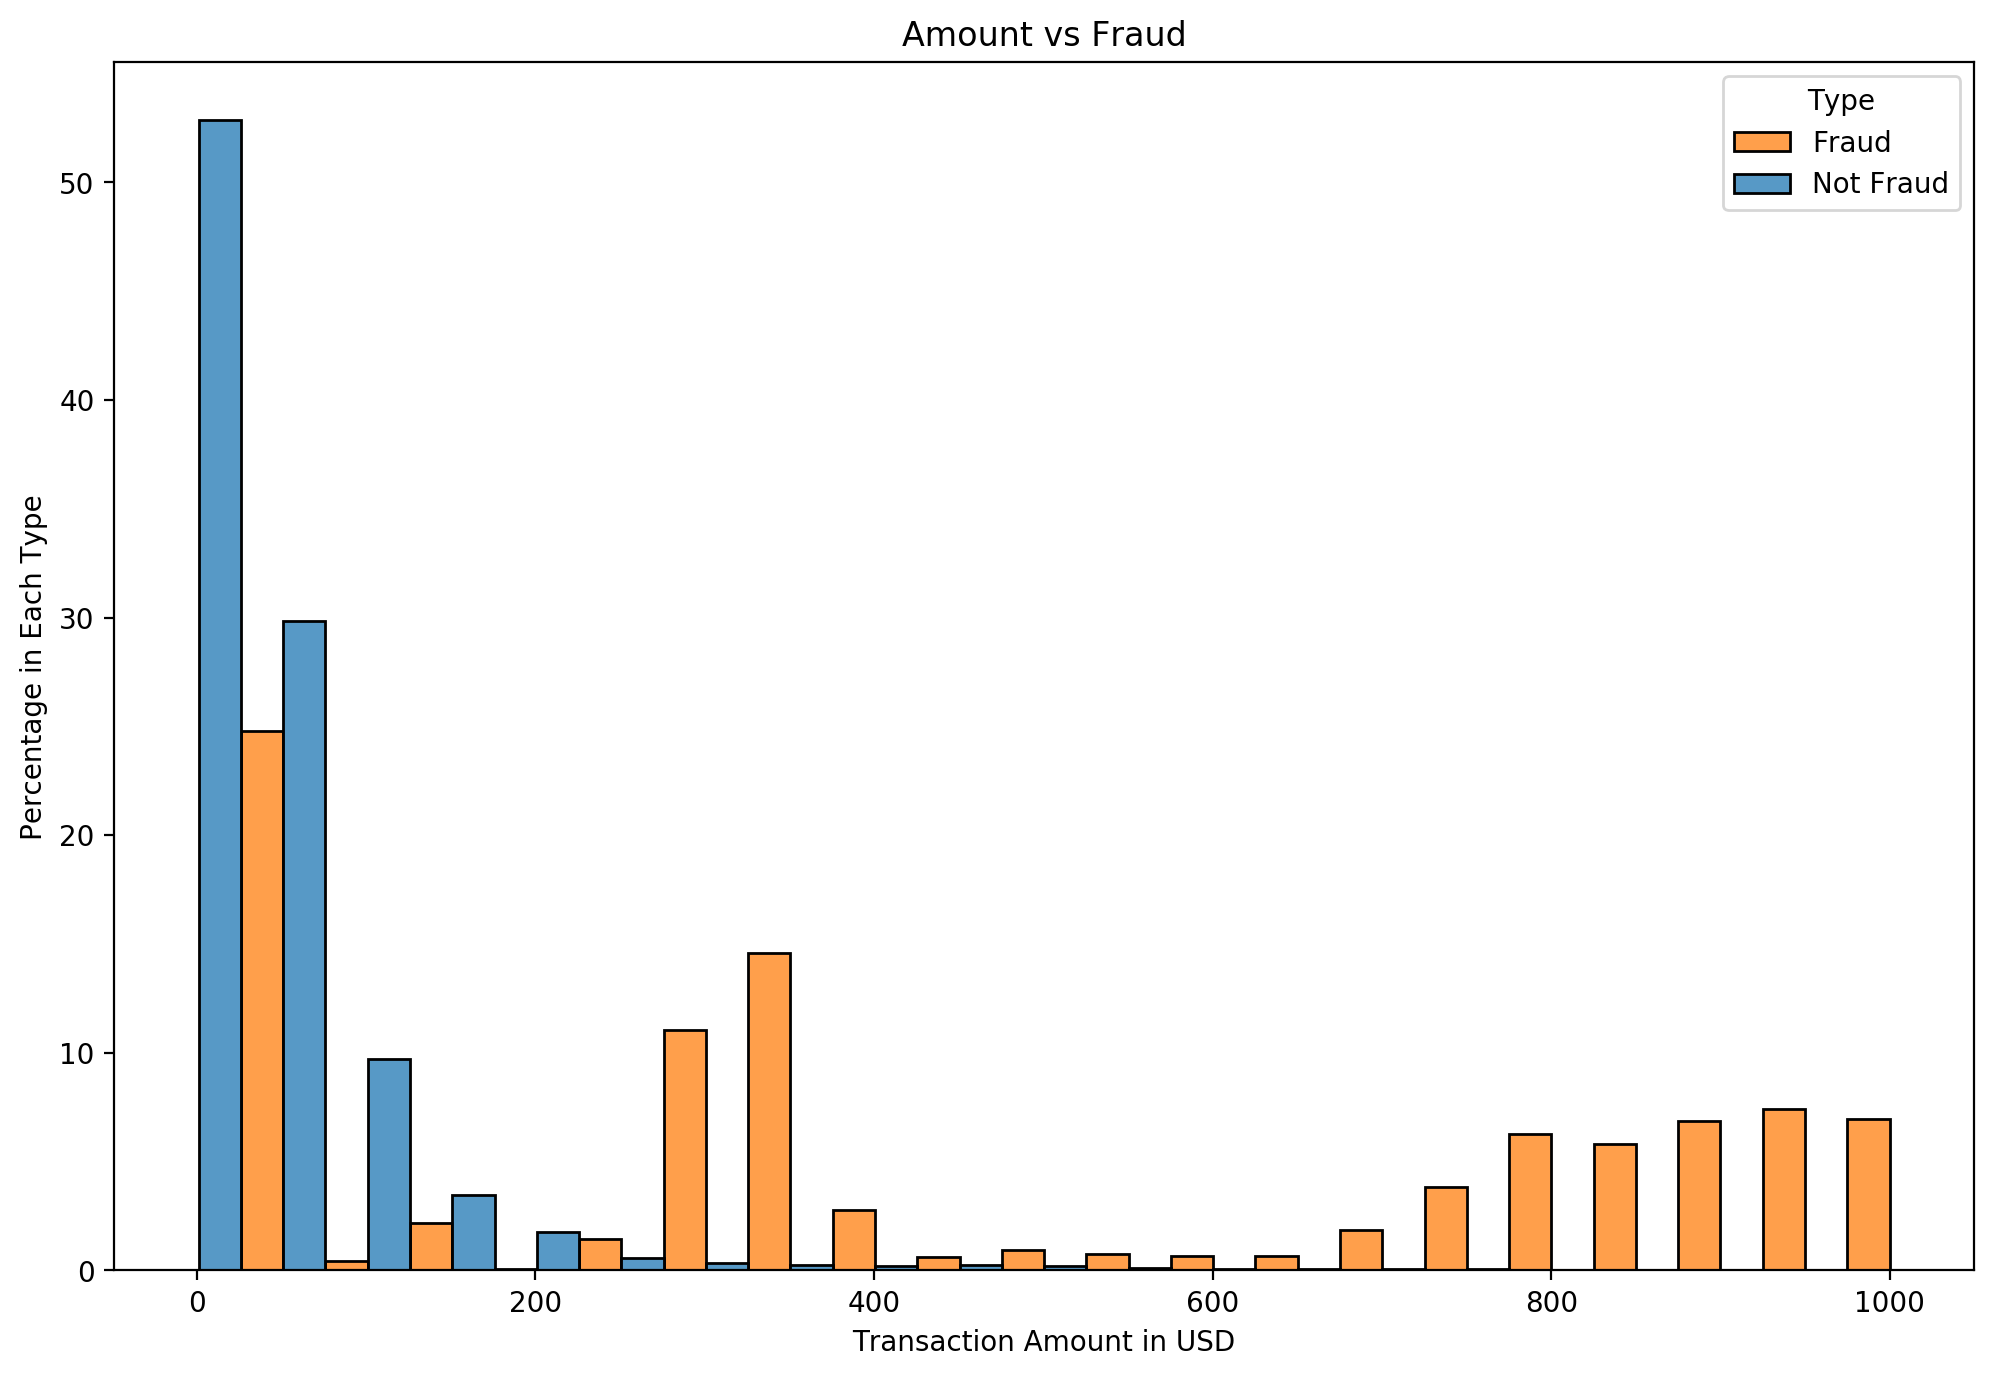

In [9]:
# taking a look at the amount of the transaction and the fraud/not fraud percentage (less than $1000)
# seeing that these are categorical values (fraud/not fraud), we use multiple='dodge' for comparison
# we don't want to normalize the data seeing that we are using amount values < 1000
# to see the percentage of fraudulant transactions, we have to set the stat to 'percent'
# this is still a large dataset so we want to reduce to only 20 bins
plt.figure(figsize=(12,8),dpi=200)
sns.histplot(x='amt',data=df[df['amt']<1000],hue='is_fraud',multiple='dodge',common_norm=False,stat='percent',bins=20)
plt.title('Amount vs Fraud')
plt.xlabel('Transaction Amount in USD')
plt.ylabel('Percentage in Each Type')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud']);

It comes to no surprise that the common transactions (less than 200) seem to have a high number of fraudulant transactions. However, we see an interesting increase of fraudulant transactions around \\$300 and the $700-\\$1000 range.

In [10]:
# looking at the number of males and females in the dataset
df['gender'].value_counts()

F    709863
M    586812
Name: gender, dtype: int64

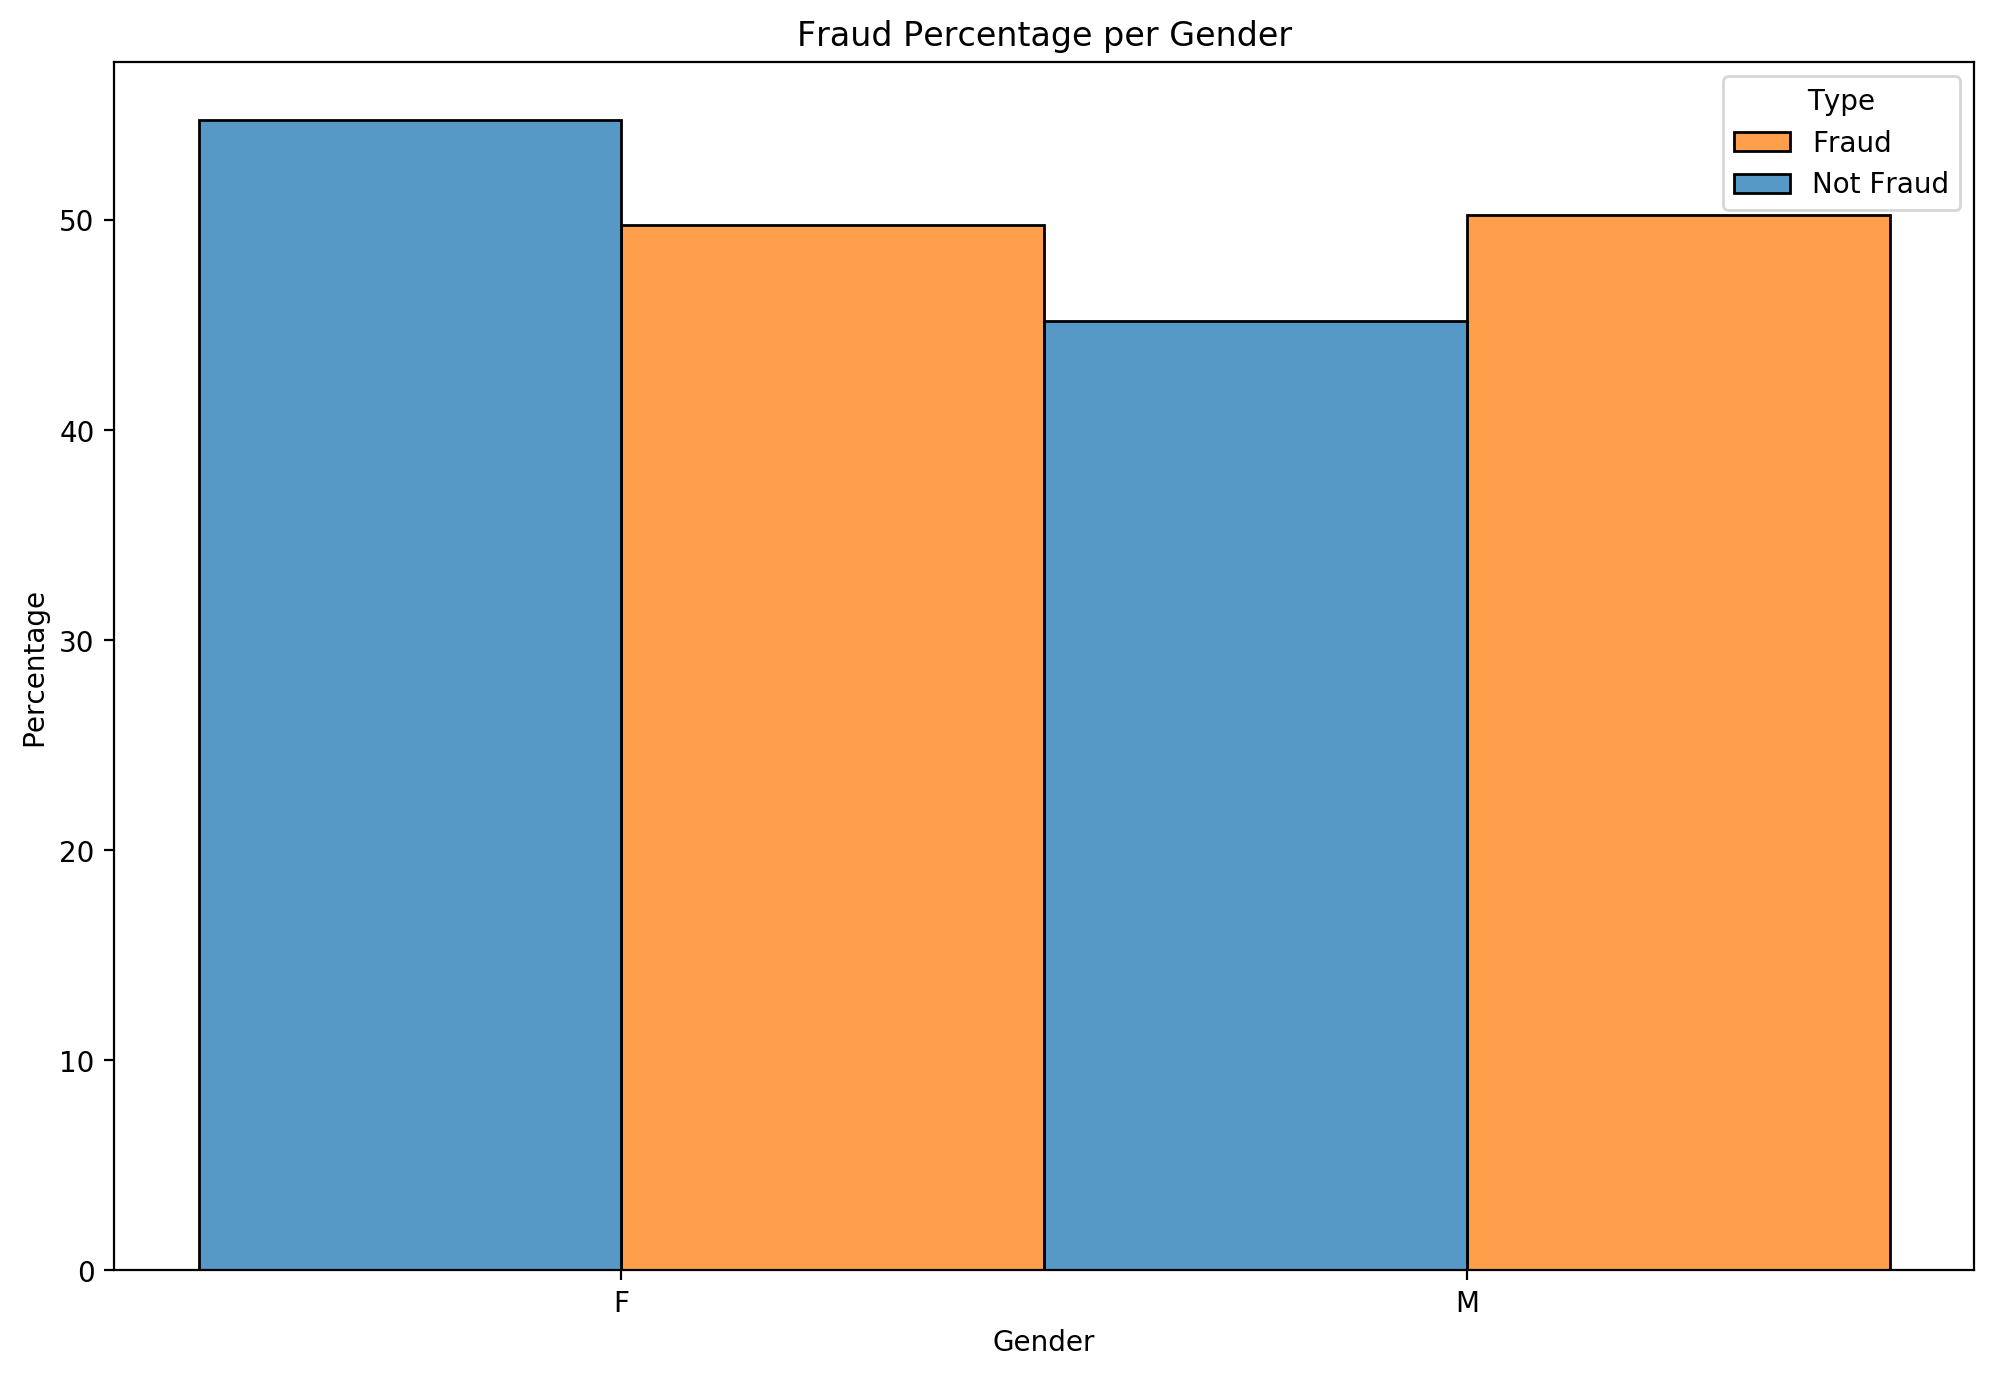

In [11]:
plt.figure(figsize=(12,8),dpi=200)
sns.histplot(x='gender',data=df,hue='is_fraud',multiple='dodge',common_norm=False,stat='percent')
plt.title('Fraud Percentage per Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud']);

It looks like both males and females have a similar fraudulant transaction percentage.

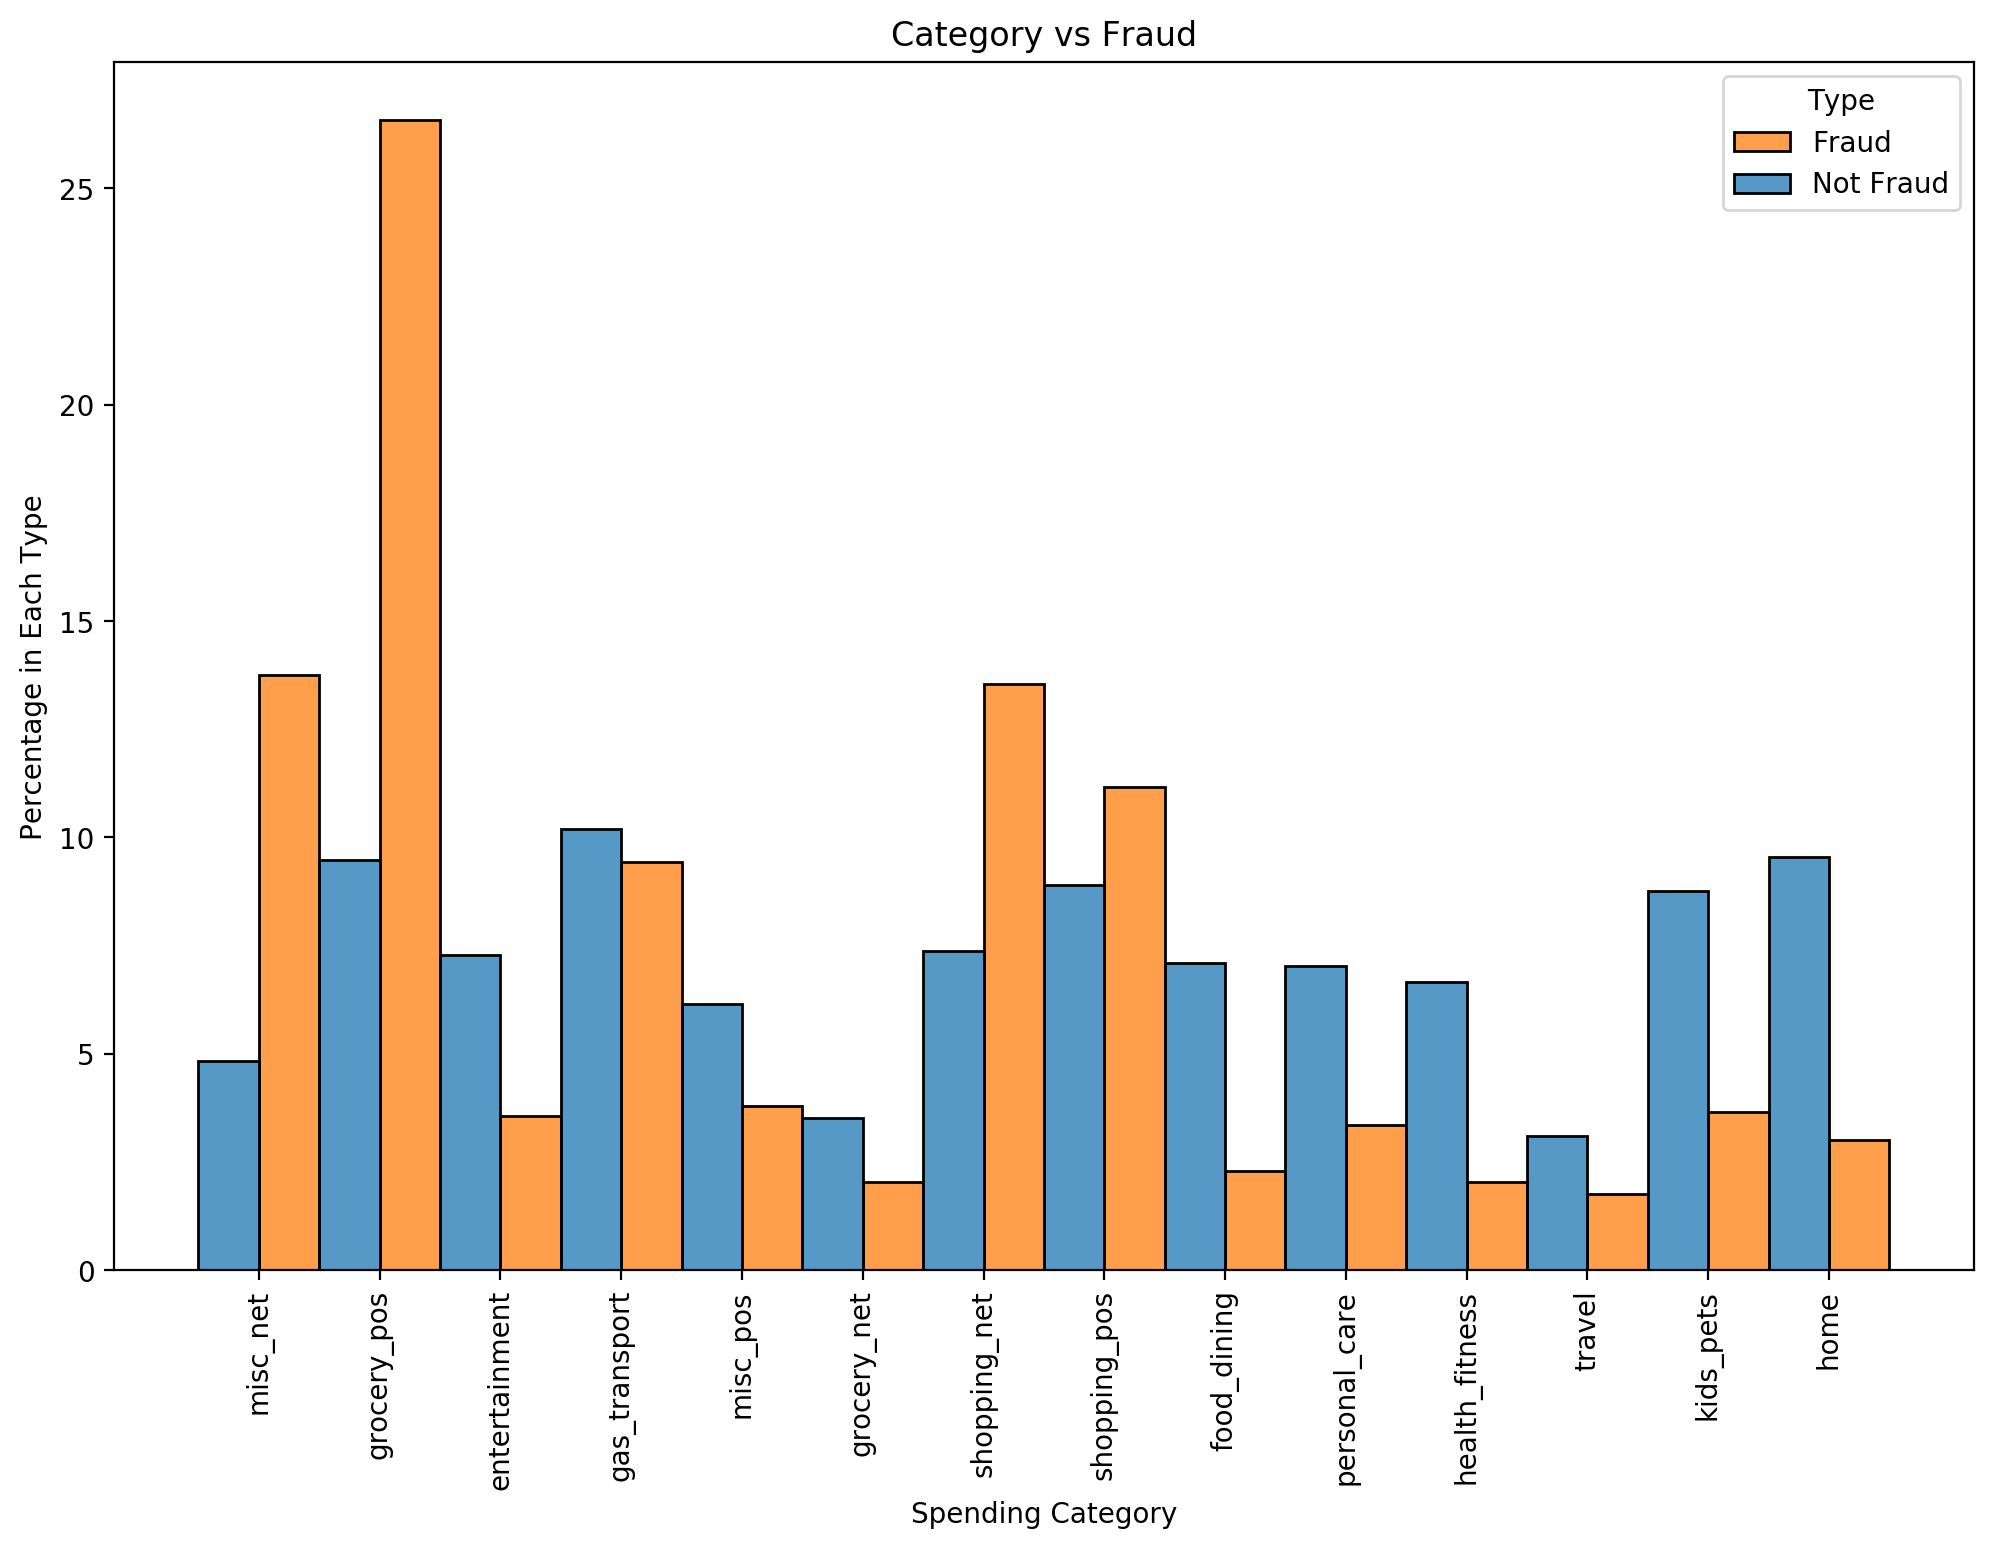

In [12]:
plt.figure(figsize=(12,8),dpi=200)
sns.histplot(x='category',data=df[df['amt']<1000],hue='is_fraud',multiple='dodge',common_norm=False,stat='percent',bins=20)
plt.title('Category vs Fraud')
plt.xlabel('Spending Category')
plt.xticks(rotation=90)
plt.ylabel('Percentage in Each Type')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud']);

In [13]:
# creating an age (estimate) column
import datetime as dt
df['age'] = dt.date.today().year-pd.to_datetime(df['dob']).dt.year

In [14]:
df['age'].value_counts().sort_values(ascending=False)

50    45483
38    40038
35    37481
37    37313
48    34299
      ...  
89     3041
90     2096
17     1959
98      536
97       11
Name: age, Length: 81, dtype: int64

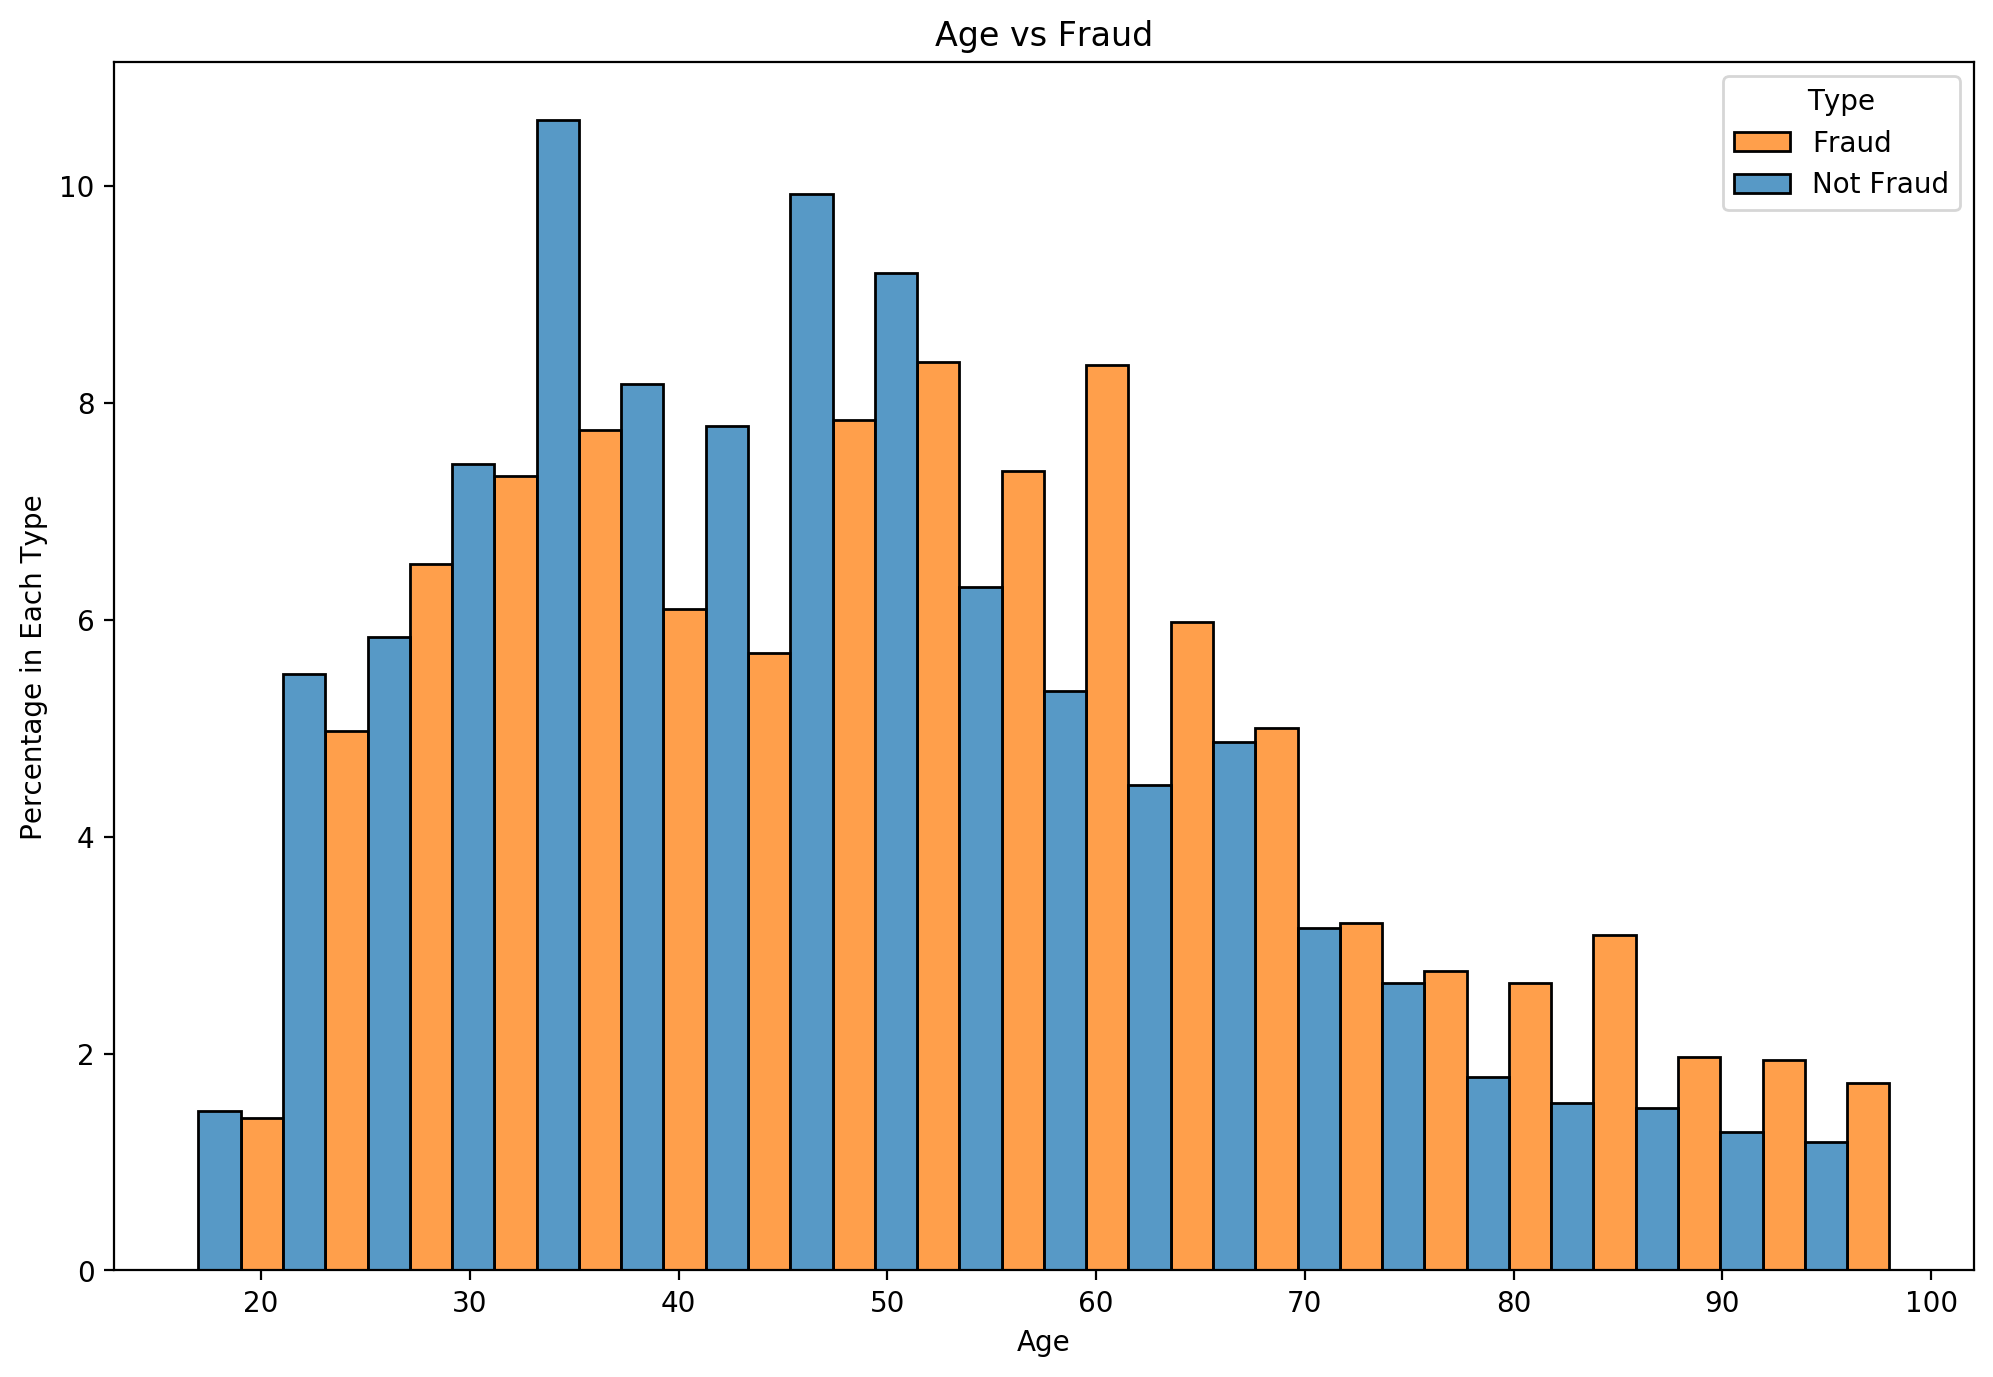

In [15]:
plt.figure(figsize=(12,8),dpi=200)
sns.histplot(x='age',data=df[df['amt']<1000],hue='is_fraud',multiple='dodge',common_norm=False,stat='percent',bins=20)
plt.title('Age vs Fraud')
plt.xlabel('Age')
plt.ylabel('Percentage in Each Type')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud']);

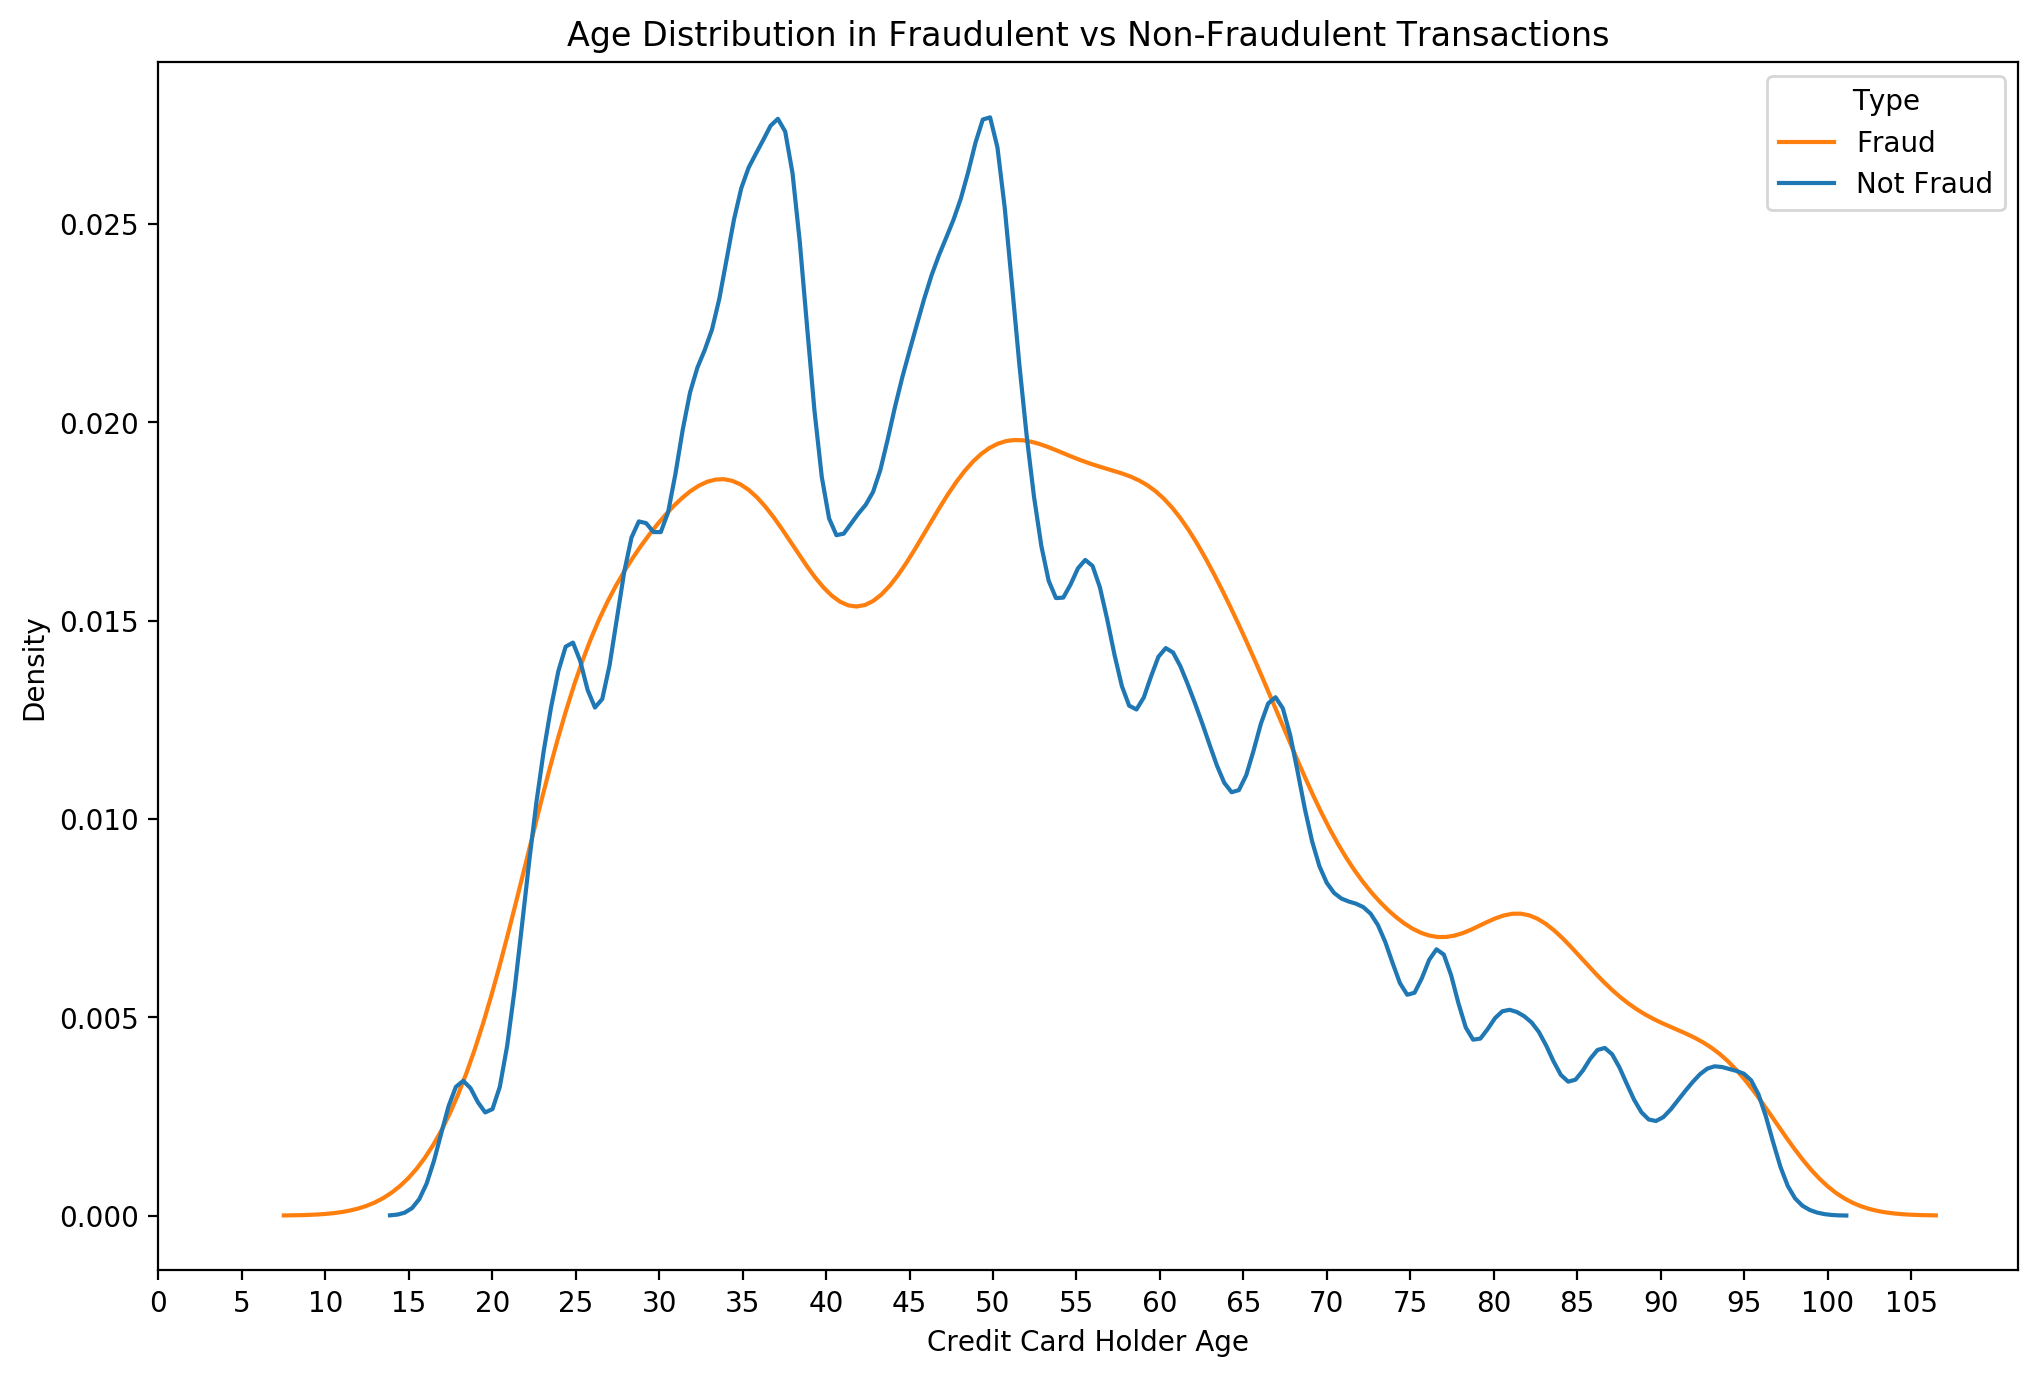

In [16]:
#age vs fraud
plt.figure(figsize=(12,8),dpi=200)
ax=sns.kdeplot(x='age',data=df, hue='is_fraud', common_norm=False)
ax.set_xlabel('Credit Card Holder Age')
ax.set_ylabel('Density')
plt.xticks(np.arange(0,110,5))
plt.title('Age Distribution in Fraudulent vs Non-Fraudulent Transactions')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud']);

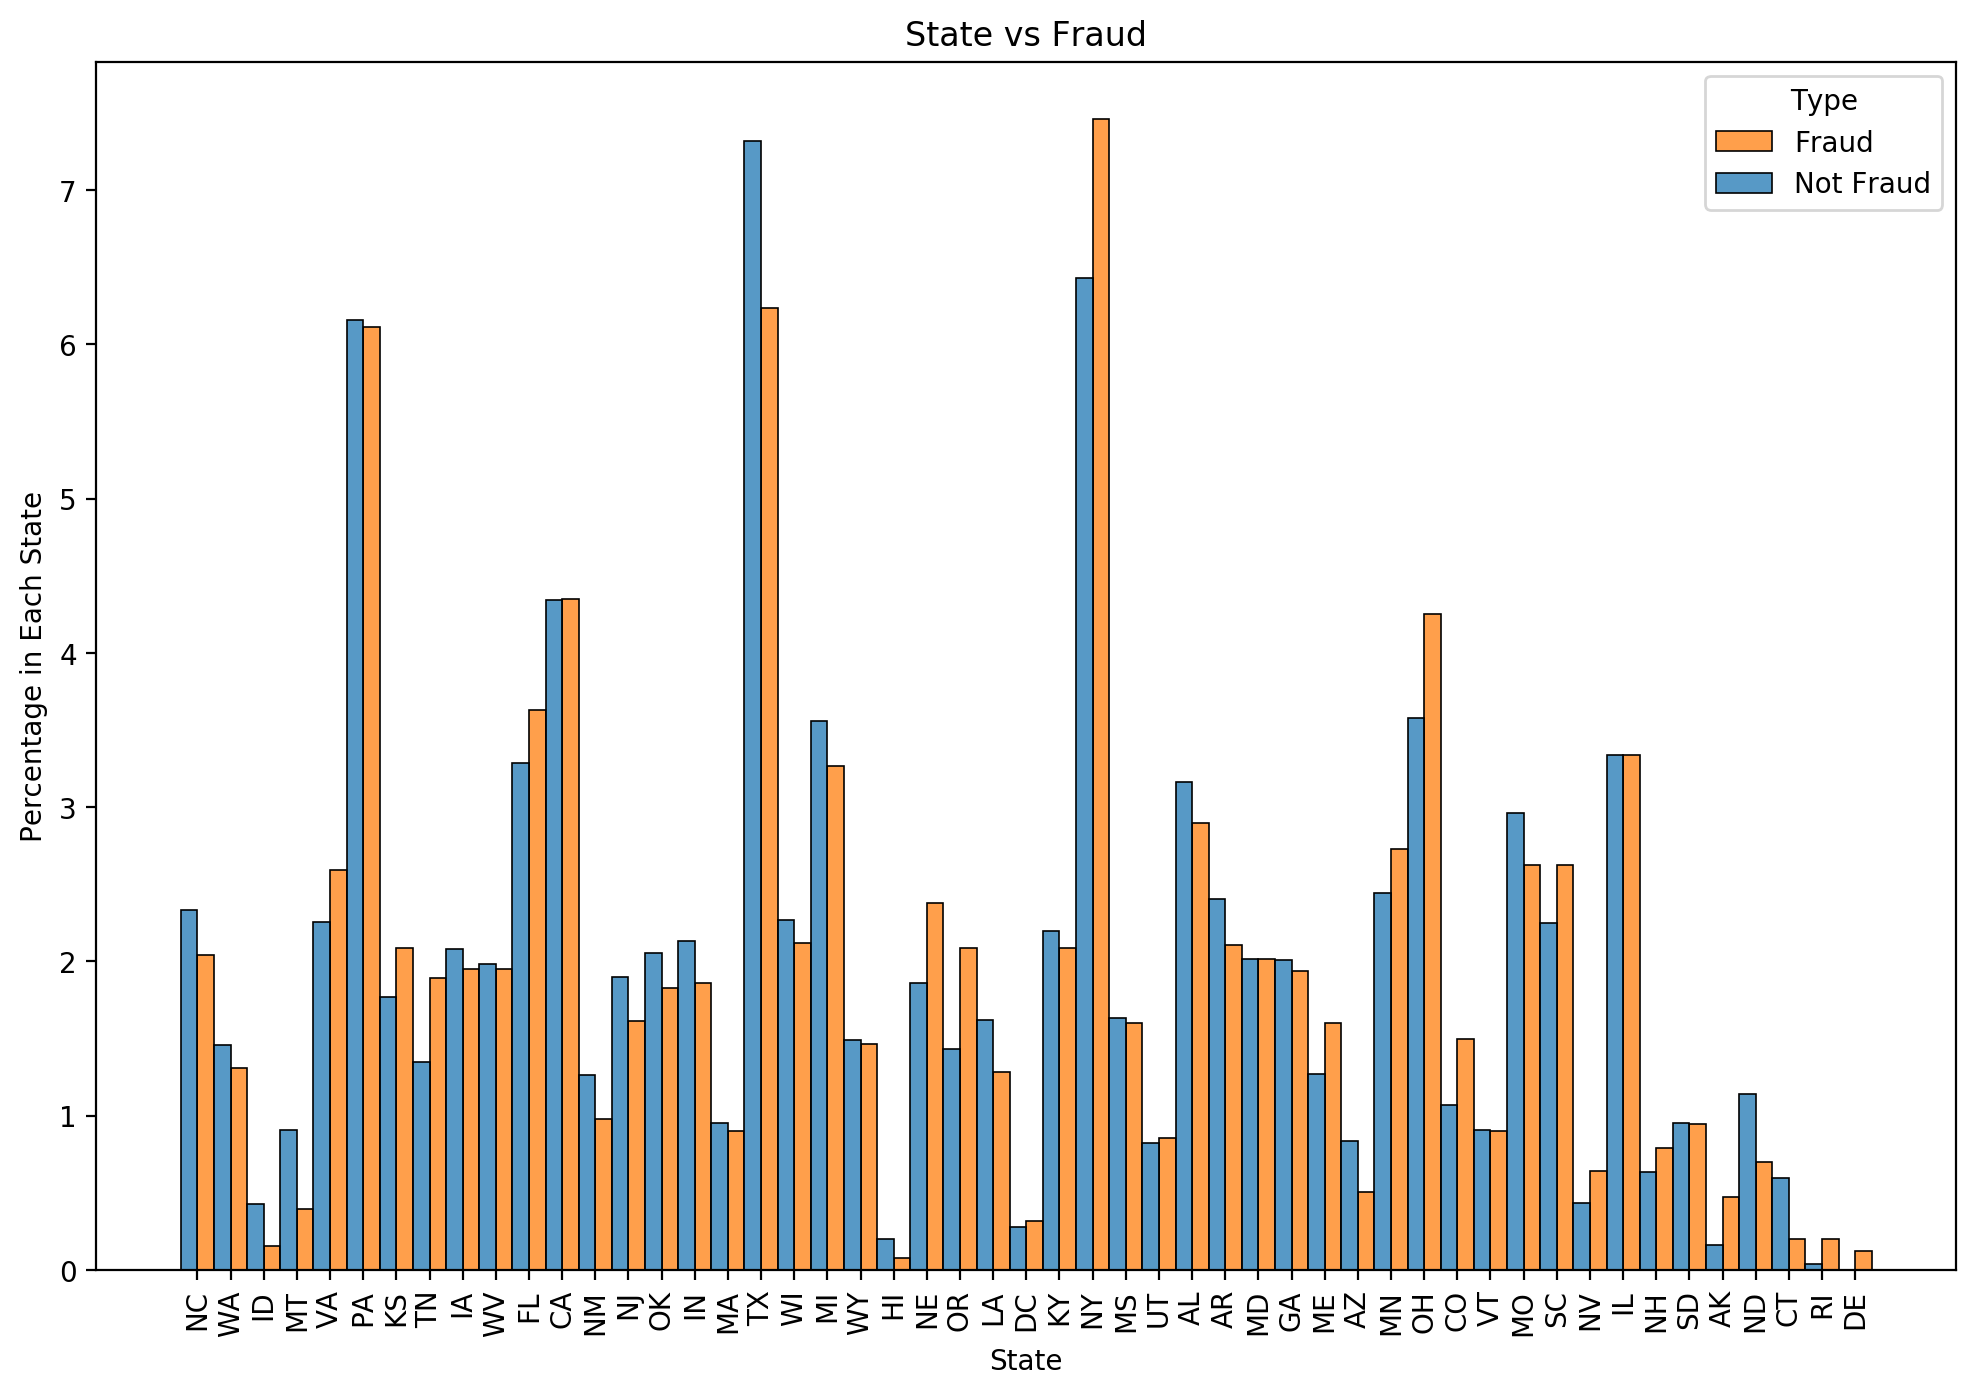

In [17]:
plt.figure(figsize=(12,8),dpi=200)
sns.histplot(x='state',data=df[df['amt']<1000],hue='is_fraud',multiple='dodge',common_norm=False,stat='percent',bins=20)
plt.title('State vs Fraud')
plt.xlabel('State')
plt.xticks(rotation=90)
plt.ylabel('Percentage in Each State')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud']);

In [18]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'age'],
      dtype='object')

In [19]:
df['category'].value_counts()

gas_transport     131659
grocery_pos       123638
home              123115
shopping_pos      116672
kids_pets         113035
shopping_net       97543
entertainment      94014
food_dining        91461
personal_care      90758
health_fitness     85879
misc_pos           79655
misc_net           63287
grocery_net        45452
travel             40507
Name: category, dtype: int64

## Machine Learning Applications

### LogisticRegression

In [20]:
df = pd.get_dummies(df, prefix=['category','gender'], columns=['category','gender'],drop_first=True)

In [21]:
df.isnull().sum()

trans_date_trans_time      0
cc_num                     0
merchant                   0
amt                        0
first                      0
last                       0
street                     0
city                       0
state                      0
zip                        0
lat                        0
long                       0
city_pop                   0
job                        0
dob                        0
trans_num                  0
unix_time                  0
merch_lat                  0
merch_long                 0
is_fraud                   0
age                        0
category_food_dining       0
category_gas_transport     0
category_grocery_net       0
category_grocery_pos       0
category_health_fitness    0
category_home              0
category_kids_pets         0
category_misc_net          0
category_misc_pos          0
category_personal_care     0
category_shopping_net      0
category_shopping_pos      0
category_travel            0
gender_M      

In [22]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'amt', 'first', 'last',
       'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job',
       'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud',
       'age', 'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'gender_M'],
      dtype='object')

In [23]:
X = df[['amt','city_pop','age', 'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'gender_M']]
y = df['is_fraud']

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaler = StandardScaler()

In [28]:
scaled_X_train = scaler.fit_transform(X_train)

In [29]:
scaled_X_test = scaler.transform(X_test)

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,plot_confusion_matrix

In [32]:
log_model = LogisticRegression()

In [33]:
log_model.fit(scaled_X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
y_pred = log_model.predict(scaled_X_test)

In [35]:
log_model.coef_

array([[ 0.48839289,  0.02996991,  0.20071704, -0.08410322,  0.19942078,
         0.05058864,  0.46728486, -0.11615642, -0.11270224, -0.01844143,
         0.33104931,  0.02862372,  0.02959824,  0.38548645,  0.13214321,
        -1.51766384,  0.12730997]])

In [36]:
accuracy_score(y_test,y_pred)

0.993599021087241

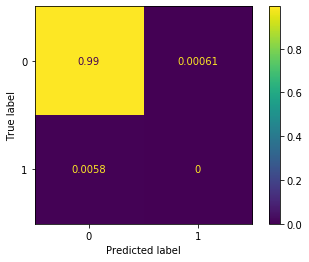

In [37]:
plot_confusion_matrix(log_model,scaled_X_test,y_test,normalize='all');

In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    386750
           1       0.00      0.00      0.00      2253

    accuracy                           0.99    389003
   macro avg       0.50      0.50      0.50    389003
weighted avg       0.99      0.99      0.99    389003



In [50]:
df_t = pd.read_csv('fraudTest.csv')

In [51]:
df_t

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [52]:
df.isnull().sum()

trans_date_trans_time      0
cc_num                     0
merchant                   0
amt                        0
first                      0
last                       0
street                     0
city                       0
state                      0
zip                        0
lat                        0
long                       0
city_pop                   0
job                        0
dob                        0
trans_num                  0
unix_time                  0
merch_lat                  0
merch_long                 0
is_fraud                   0
age                        0
category_food_dining       0
category_gas_transport     0
category_grocery_net       0
category_grocery_pos       0
category_health_fitness    0
category_home              0
category_kids_pets         0
category_misc_net          0
category_misc_pos          0
category_personal_care     0
category_shopping_net      0
category_shopping_pos      0
category_travel            0
gender_M      

In [53]:
df_t['age'] = dt.date.today().year-pd.to_datetime(df_t['dob']).dt.year

In [54]:
df_t = pd.get_dummies(df_t, prefix=['category','gender'], columns=['category','gender'],drop_first=True)

In [55]:
X_t = df_t[['amt','city_pop','age', 'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'gender_M']]

In [56]:
scaled_X_t = scaler.transform(X_t)

In [57]:
y_pred_t = log_model.predict(scaled_X_test)

In [58]:
accuracy_score(y_test,y_pred_t)

0.993599021087241

In [59]:
y_pred_t

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### RandomForestClassifier

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
rfc = RandomForestClassifier(oob_score = True)

In [73]:
rfc.fit(scaled_X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [74]:
rfc.oob_score_

0.9973272283379899

In [75]:
predictions = rfc.predict(scaled_X_test)

In [76]:
accuracy_score(y_test,y_pred)

0.993599021087241

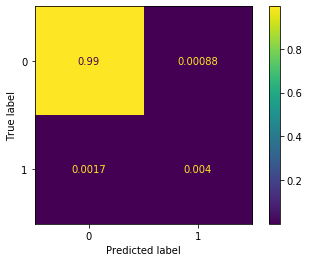

In [77]:
plot_confusion_matrix(rfc,scaled_X_test,y_test,normalize='all');

In [78]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    386750
           1       0.82      0.70      0.76      2253

    accuracy                           1.00    389003
   macro avg       0.91      0.85      0.88    389003
weighted avg       1.00      1.00      1.00    389003

